<a href="https://colab.research.google.com/github/Dawoon-Jeong0523/Lecture_UNIST_2024_Fall/blob/main/Week_14_Transformer_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: "CS231n: Deep Learning for Computer Vision" https://cs231n.stanford.edu/schedule.html

---

# Seq2Seq Models and Their Limitations

In traditional seq2seq models, the encoder compresses the input sequence into a single fixed-size vector representation known as the **context vector**, and the decoder generates the output sequence based on this context vector.

However, seq2seq models based on RNNs have two major limitations:

1. **Information Loss**  
   - Compressing all the information from the input sequence into a single fixed-size vector often leads to significant information loss, especially for long sequences.

2. **Vanishing Gradient Problem**  
   - RNNs suffer from the vanishing gradient problem, which makes it difficult to learn long-range dependencies during training.

   
### Impact on Machine Translation
These limitations manifest as reduced translation quality in machine translation tasks, especially when the input sentences are long. To address these issues, **attention mechanisms** were introduced. Attention helps mitigate the degradation in output accuracy caused by longer input sequences, providing a more effective way to model dependencies in sequential data.

The introduction of attention was a turning point in addressing these challenges and paved the way for further advancements, such as the Transformer model.


___

English to Italian machine translation

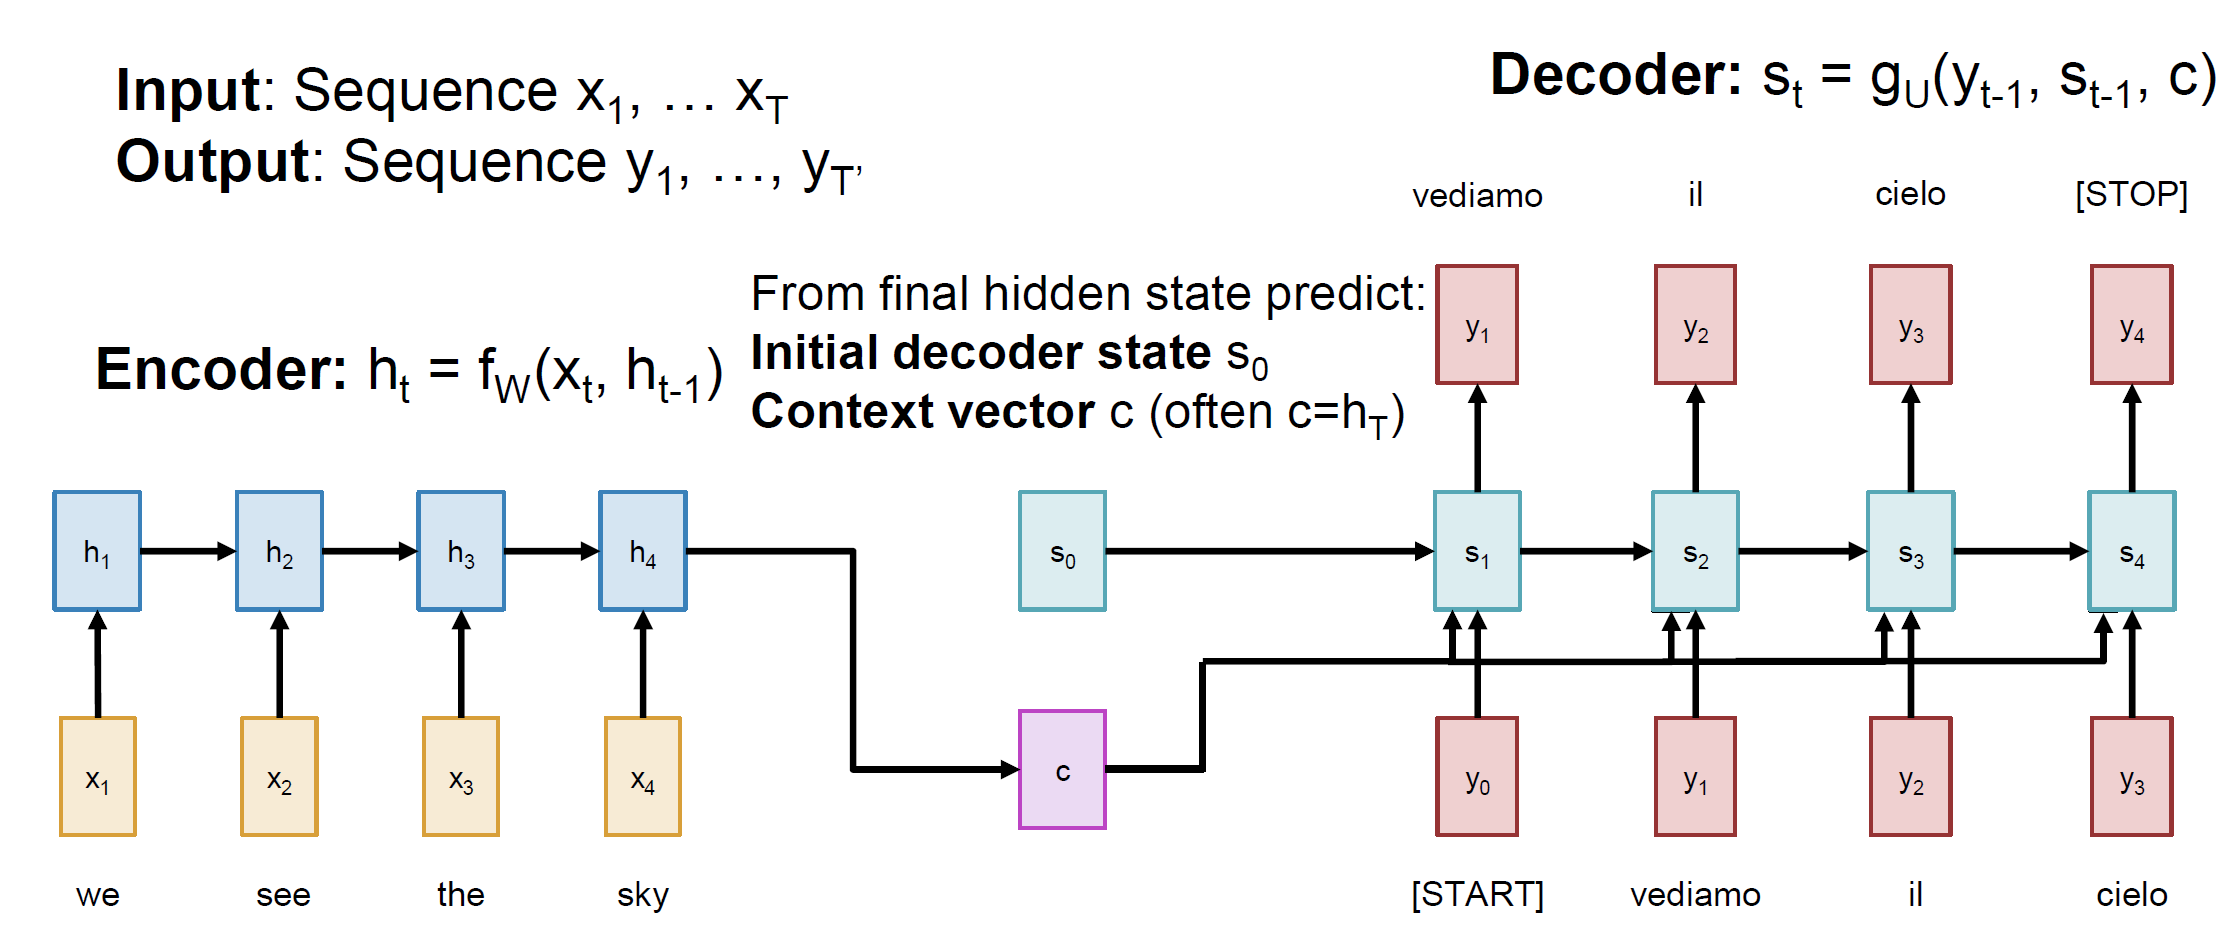

Sutskever et al. "Sequence to sequence learning with neural networks", NeurlPS 2014

---

## The Idea of Attention

The core idea of the attention mechanism is that, at each time step during decoding, the decoder refers back to the entire input sentence encoded by the encoder. However, instead of attending to all parts of the input sentence equally, the decoder selectively focuses more on specific parts of the input that are more relevant to predicting the current output word. This selective focus allows the model to attend (or "pay attention") to the most important parts of the input sequence.

---



Bahdanau et al, 'Neural machine translation by jointly learning to align and translate", ICLR 2015


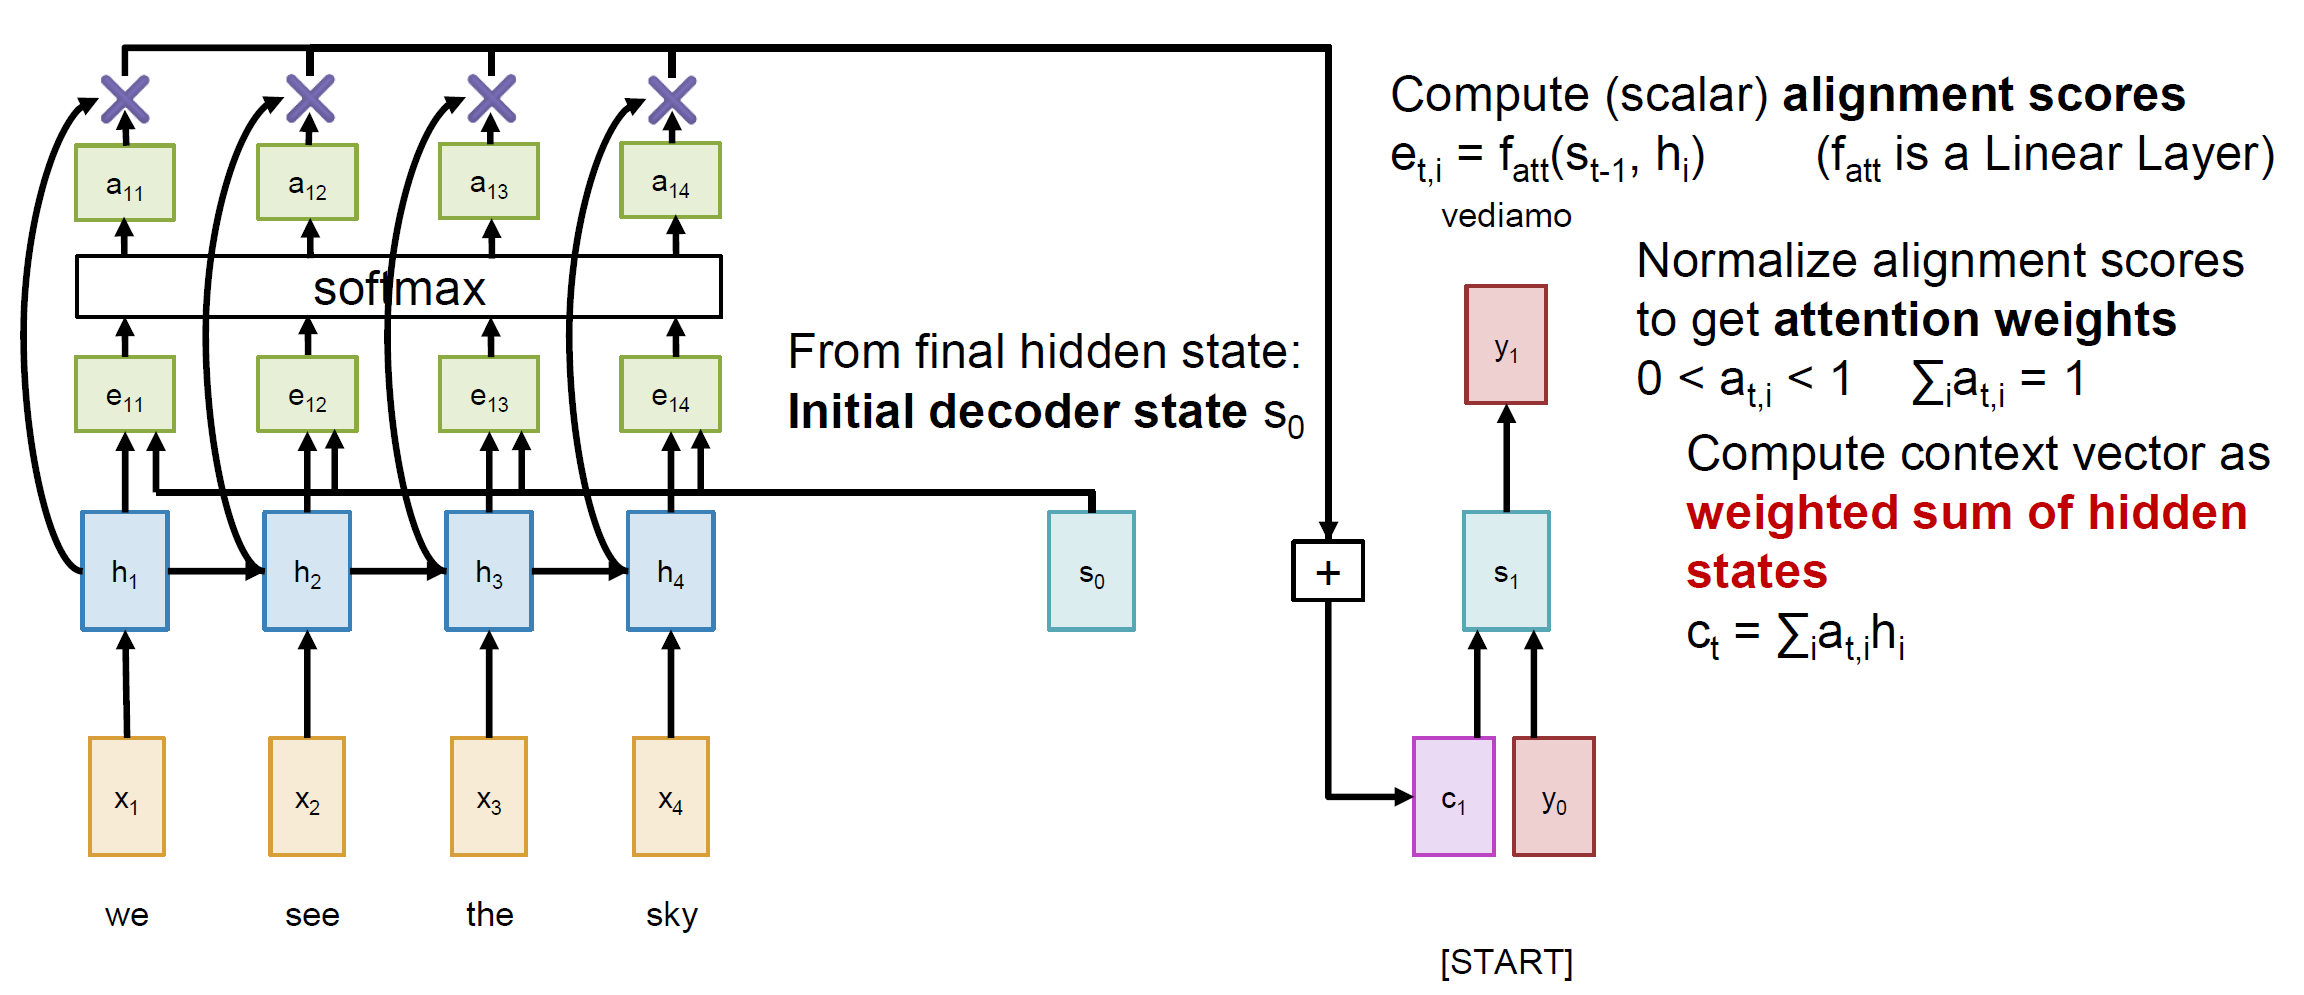


---

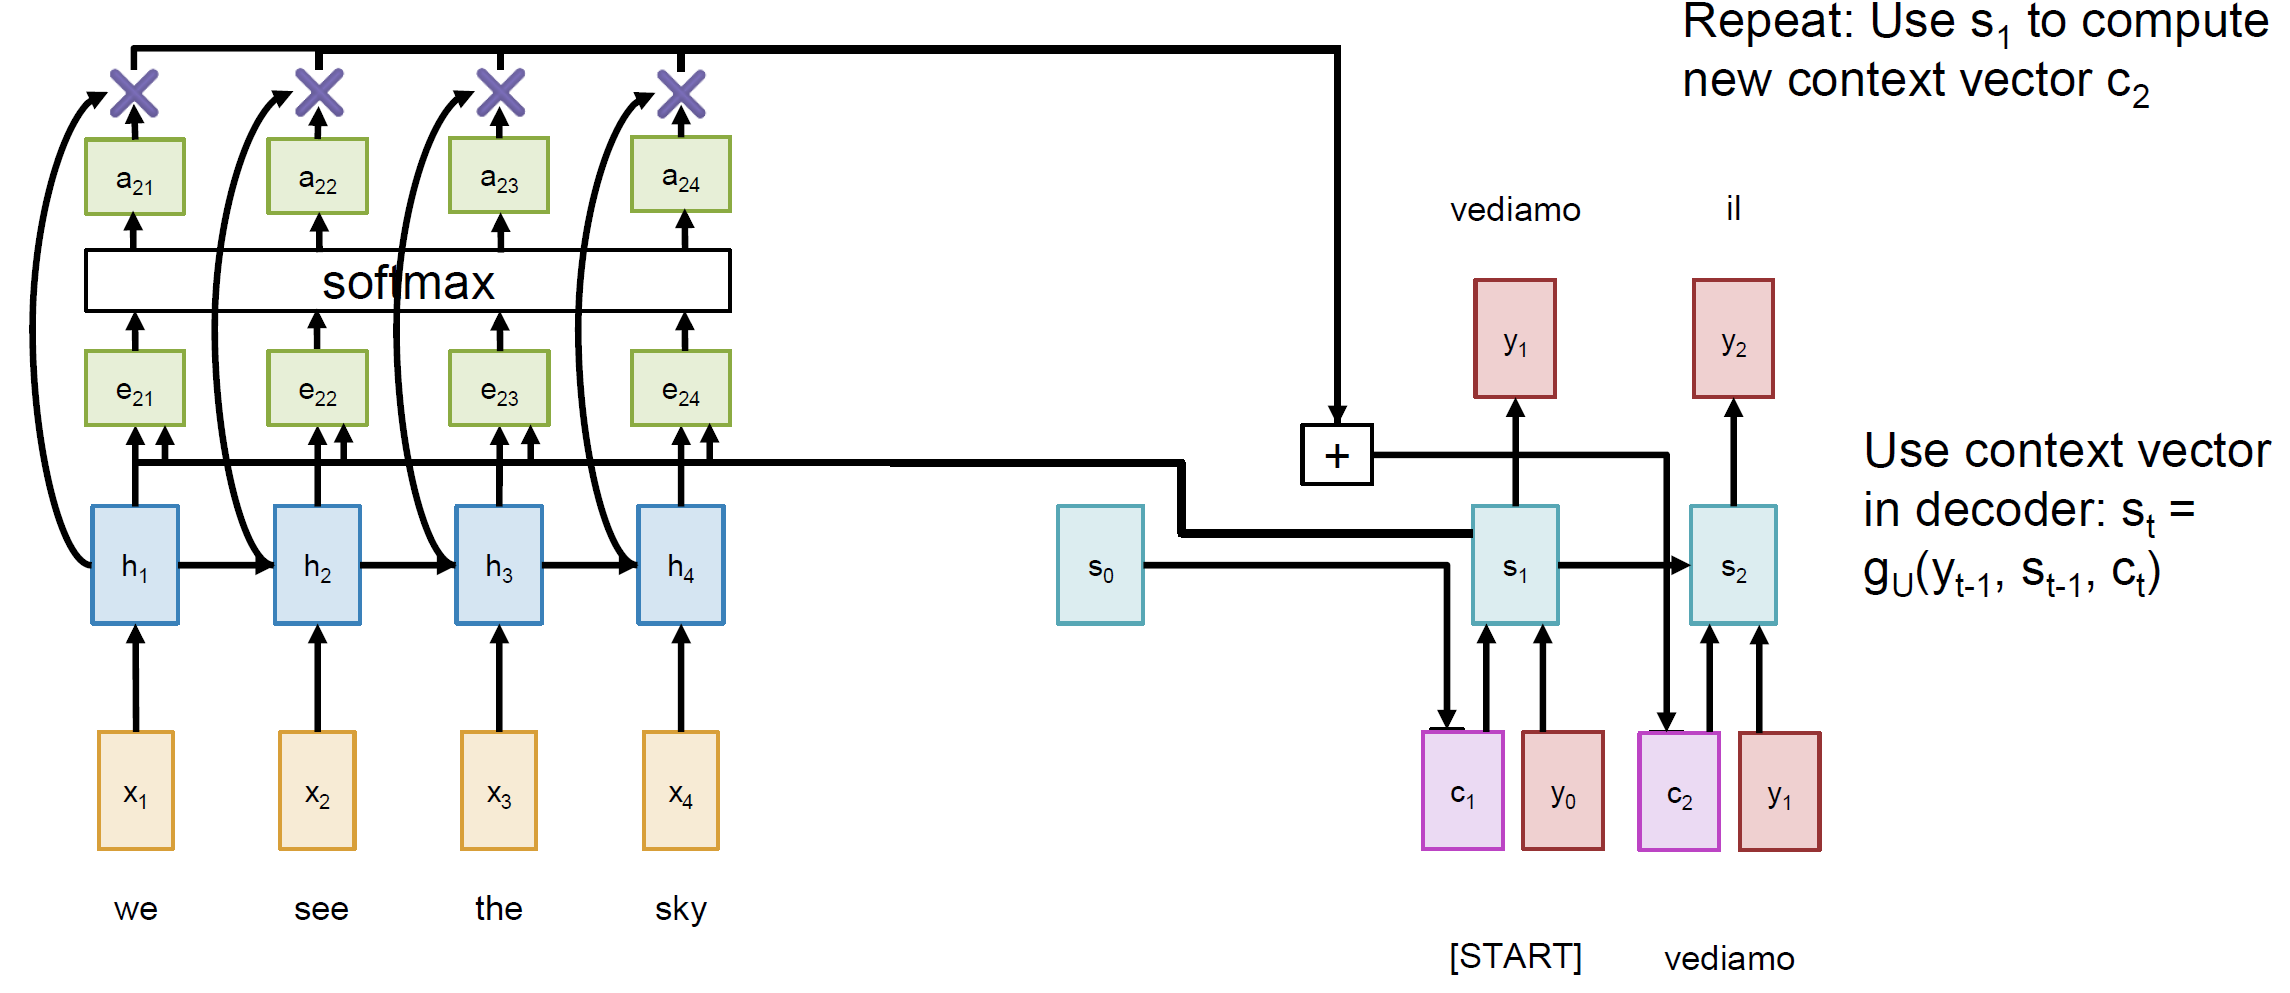

---

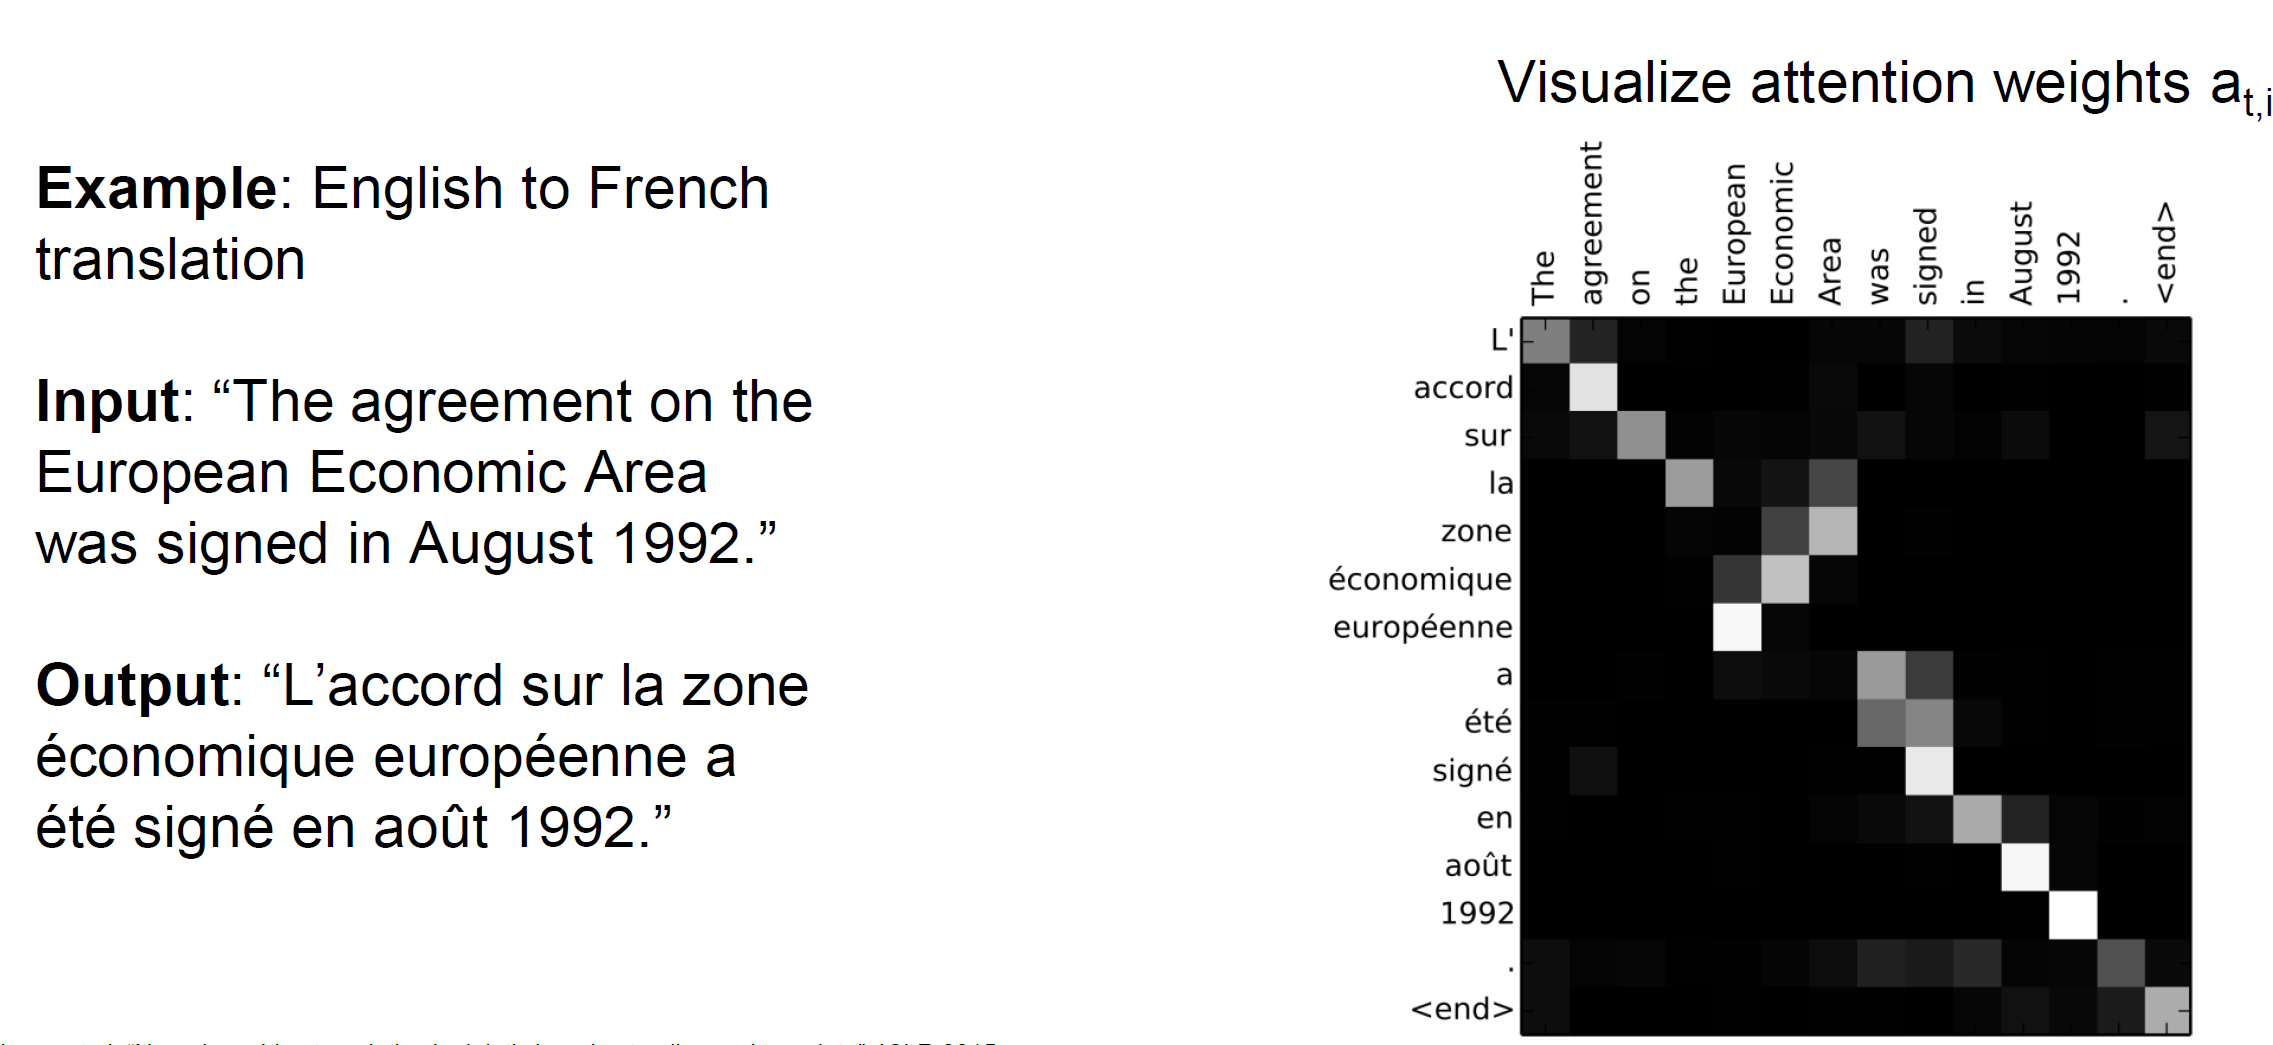

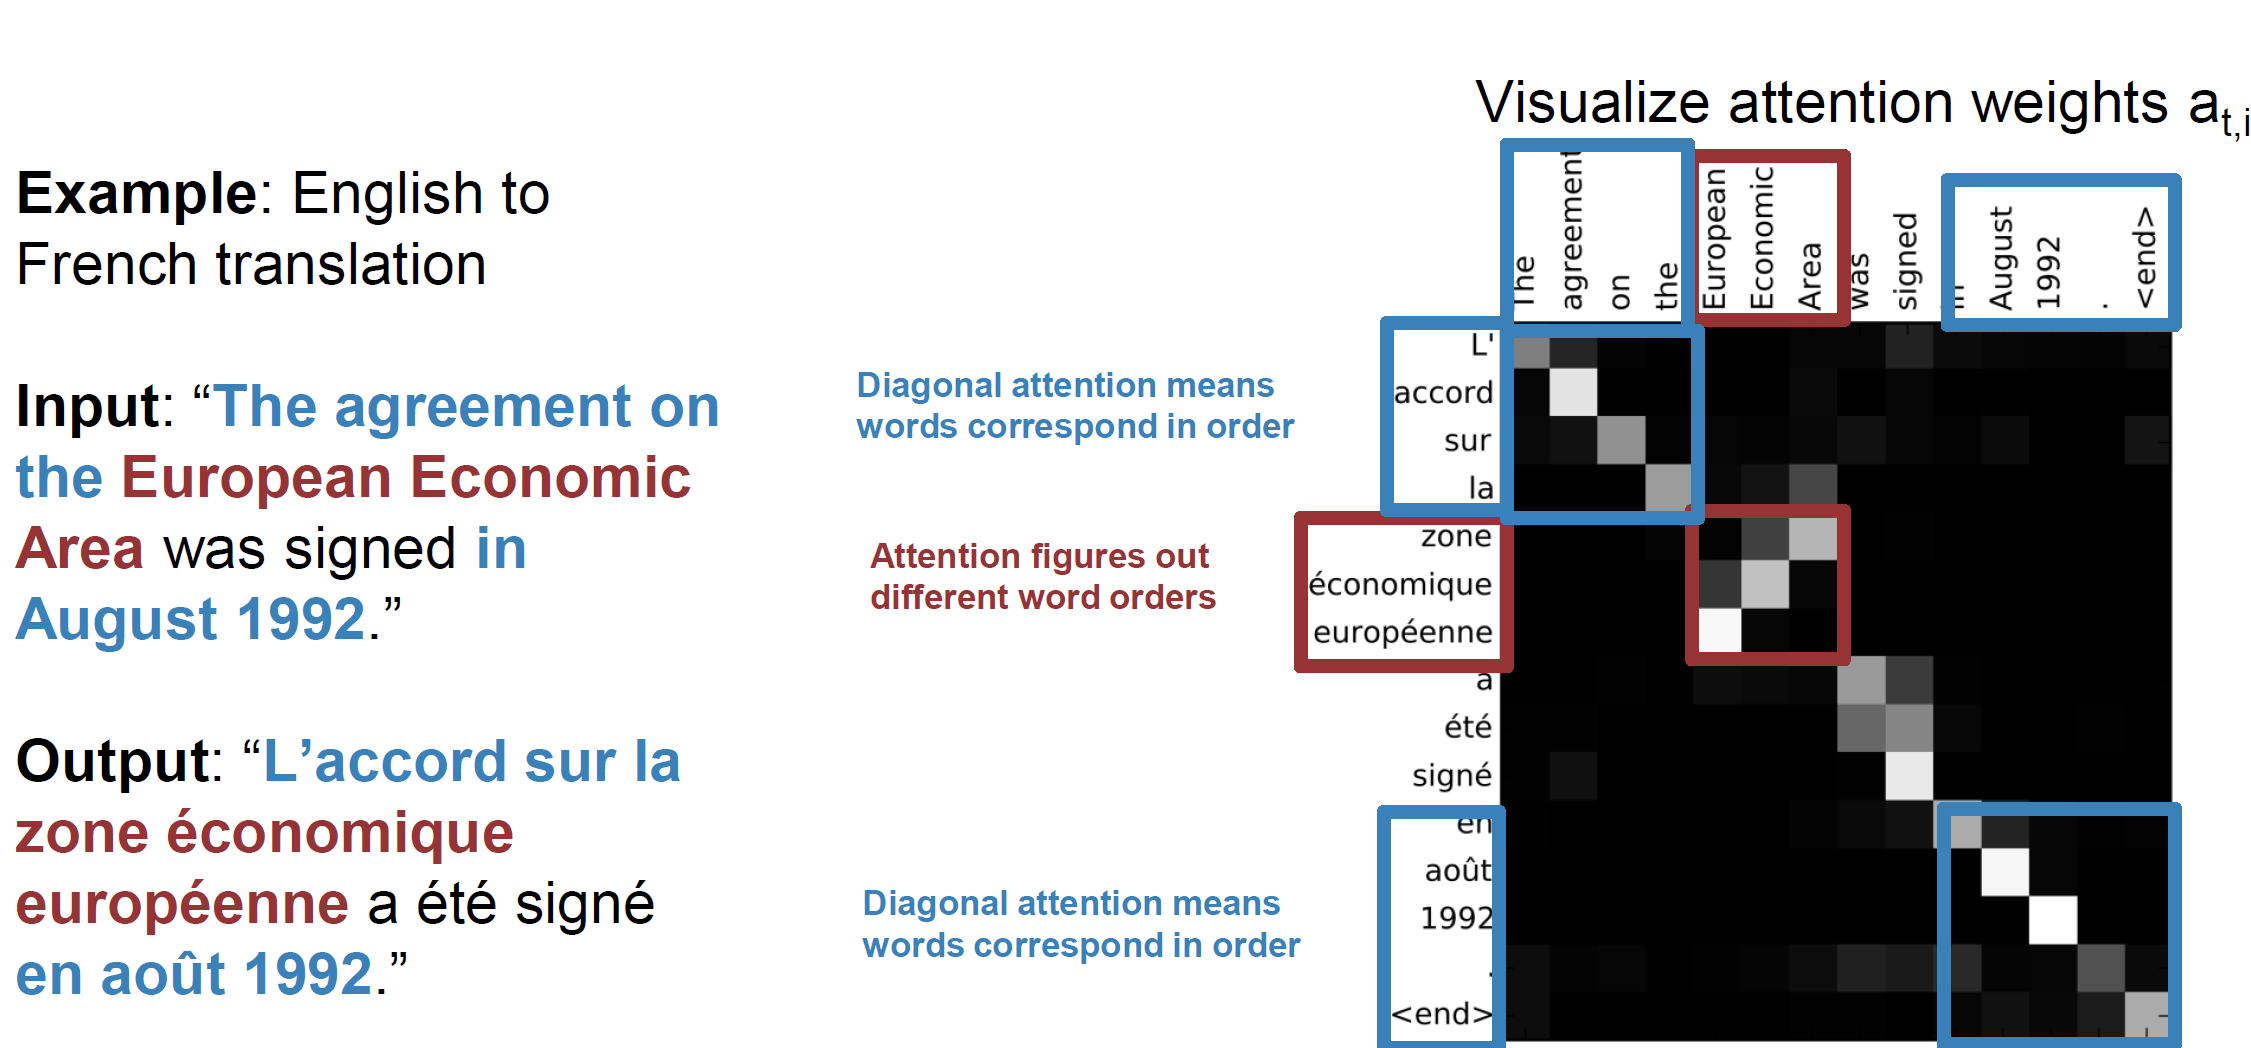

# Attention Function

The attention function can be represented as:

$$
\text{Attention}(Q, K, V) = \text{Attention Value}
$$

### How the Attention Function Works

1. **Similarity Calculation:**  
   For a given **Query (Q)**, the attention function computes the similarity (or relevance) between the Query and all **Keys (K)**.

2. **Adjusting Values:**  
   The computed similarity scores are applied to the corresponding **Values (V)** mapped to each Key.

3. **Aggregation:**  
   Finally, the adjusted Values are summed up to produce the **Attention Value**, which is the output of the attention function.

---

### Components of Q, K, and V in seq2seq Models

In seq2seq models equipped with an attention mechanism, the components **Q**, **K**, and **V** correspond to the following:

- **Q (Query):** The hidden state of the decoder cell at time step \( t \).
- **K (Keys):** The hidden states of all encoder cells across all time steps.
- **V (Values):** The hidden states of all encoder cells across all time steps (identical to Keys in this context).

This structured representation highlights the fundamental operations of the attention mechanism and its role in seq2seq models.

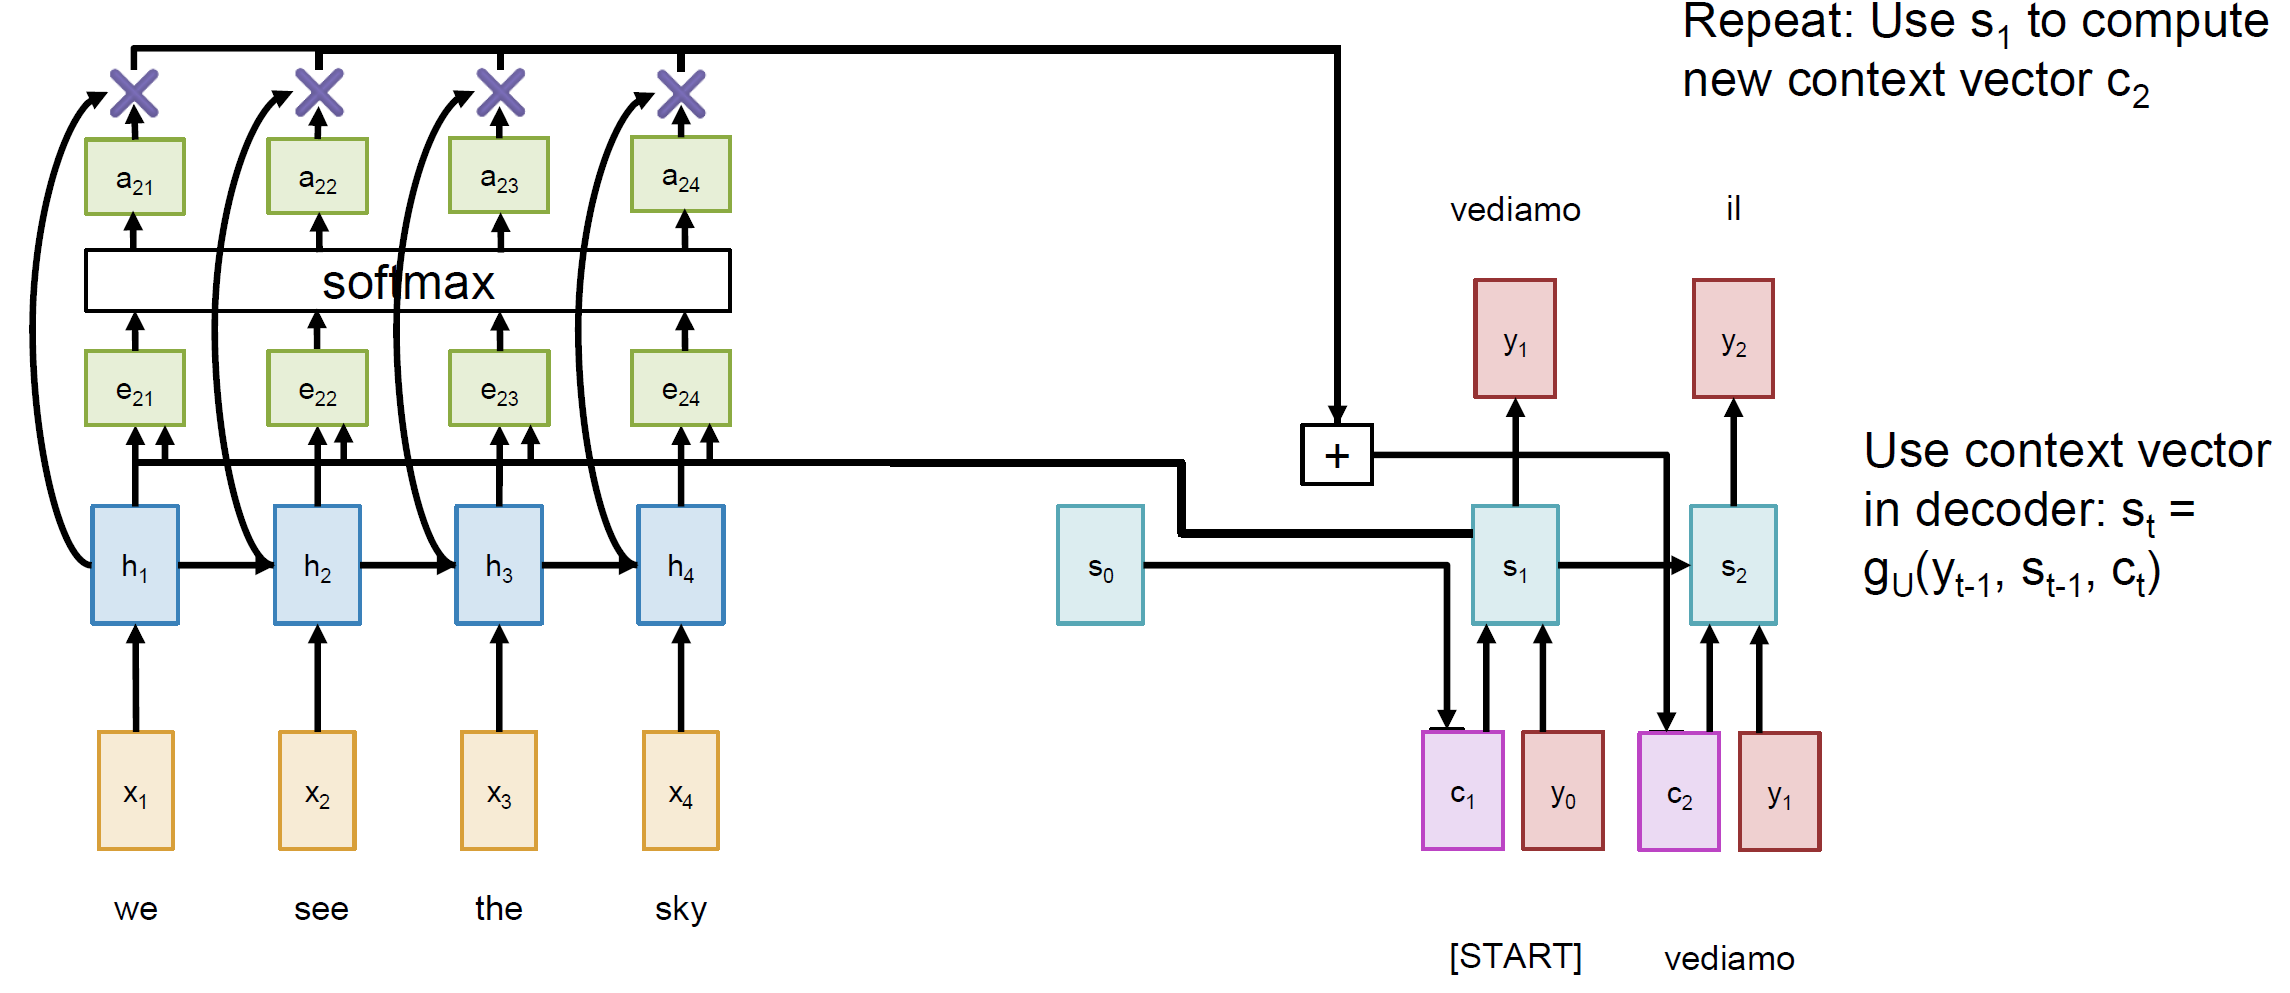

## Dot-Product Attention (Luong Attention)

### Encoder Time Steps and Hidden States

Let’s define the encoder time steps as $1, 2, \ldots, N$. The encoder’s hidden states at each time step are represented as $h_1, h_2, \ldots, h_N$. Similarly, the decoder’s hidden state at the current time step $t$ is represented as $s_t$. For simplicity, we assume that the dimensionality of the encoder and decoder hidden states is the same.

Before discussing the first step of the attention mechanism—calculating the **Attention Score**—let’s revisit the inputs required at the decoder’s time step $t$. In a basic seq2seq model, the decoder requires two inputs at time step $t$:
1. The hidden state from the previous time step $t-1$.
2. The output word from the previous time step $t-1$.

In contrast, attention mechanisms introduce a new value: the **Attention Value**, denoted as $c_t$, which is required to predict the output word at time step $t$.

---


In [ ]:
import numpy as np

# Define encoder hidden states (h1, h2, ..., hN)
N = 6  # Number of time steps
hidden_dim = 4  # Dimension of hidden states

# Randomly initialize encoder hidden states
encoder_hidden_states = np.random.rand(N, hidden_dim)

print("Encoder Hidden States (h_i):")
print(encoder_hidden_states)


### Attention Score

The entire attention mechanism is centered around calculating $c_t$. The journey begins with computing the **Attention Score**, which measures the similarity between the decoder’s current hidden state $s_t$ and each encoder hidden state $h_i$.

In **Dot-Product Attention**, the attention score is calculated by performing a dot product between $s_t$ (transposed) and each encoder hidden state $h_i$. Each attention score is a scalar value. For example, the attention score between $s_t$ and the $i$-th encoder hidden state $h_i$ is given by:

$$
\text{Score}(s_t, h_i) = s_t^\top h_i
$$

We can generalize this for all encoder hidden states to form the attention scores vector $e_t$, defined as:

$$
e_t = [\text{Score}(s_t, h_1), \text{Score}(s_t, h_2), \ldots, \text{Score}(s_t, h_N)]^\top
$$



In [ ]:
# Define decoder hidden state at time step t (s_t)
decoder_hidden_state = np.random.rand(hidden_dim)

# Calculate attention scores (dot-product of s_t and each h_i)
attention_scores = np.dot(encoder_hidden_states, decoder_hidden_state)

print("\nDecoder Hidden State (s_t):")
print(decoder_hidden_state)
print("\nAttention Scores:")
print(attention_scores)


### Attention Distribution

The attention scores $e_t$ are normalized using the softmax function to produce a probability distribution where all values sum to 1. This normalized vector is called the **Attention Distribution**, and each element represents an **Attention Weight**:

$$
\alpha_{t,i} = \frac{\exp(e_{t,i})}{\sum_{j=1}^{N} \exp(e_{t,j})}
$$

For instance, if the attention weights for the encoder hidden states corresponding to the words "I," "am," "a," and "student" are $0.1, 0.4, 0.1, 0.4$, their sum is 1. The size of the rectangles in the visualization represents the magnitude of the attention weights.

---


In [ ]:
# Normalize attention scores using softmax to get attention weights
def softmax(scores):
    exp_scores = np.exp(scores - np.max(scores))  # Stability improvement
    return exp_scores / np.sum(exp_scores)

attention_weights = softmax(attention_scores)
print("\nAttention Weights (Softmax):")
print(attention_weights)


### Calculating the Attention Value

The **Attention Value** $c_t$ is obtained by taking the weighted sum of the encoder hidden states, where each weight is an attention weight:

$$
c_t = \sum_{i=1}^{N} \alpha_{t,i} h_i
$$

This weighted sum is often referred to as the **context vector**, as it summarizes the encoder's contextual information relevant to the decoder’s current state. Unlike basic seq2seq models, where the encoder’s last hidden state is used as the context vector, the attention mechanism dynamically computes $c_t$ at each time step.

---


In [ ]:
# Calculate the attention value (weighted sum of encoder hidden states)
attention_value = np.sum(
    encoder_hidden_states * attention_weights[:, np.newaxis], axis=0
)

print("\nAttention Value (c_t):")
print(attention_value)


### Concatenation with the Decoder's Hidden State

Once the attention value $c_t$ is computed, it is concatenated with the decoder's current hidden state $s_t$ to form a new vector:

$$
v_t = \text{Concat}(c_t, s_t)
$$

This vector $v_t$ is then used as input to the output layer for predicting the next word.

---


In [ ]:
# Concatenate attention value with decoder hidden state
concatenated_vector = np.concatenate((attention_value, decoder_hidden_state))

print("\nDecoder_hidden_state (s_t):")
print(decoder_hidden_state)
print("\nConcatenated Vector (v_t):")
print(concatenated_vector)


### Generating the Output Layer Input

Before passing $v_t$ to the output layer, the model applies a transformation using a weight matrix $W$ and a bias $b$, followed by a non-linear activation function like tanh. This produces a new vector $o_t$, which is used as the input to the output layer:

$$
o_t = \tanh(W v_t + b)
$$

Here:
- $W$ is a trainable weight matrix.
- $b$ is the bias term (not shown in the diagram for simplicity).

---

In [ ]:
# Transform concatenated vector using a trainable weight matrix and bias
W = np.random.rand(hidden_dim * 2, hidden_dim)  # Weight matrix
b = np.random.rand(hidden_dim)  # Bias

s_t_atterntion = np.tanh(np.dot(concatenated_vector, W) + b)

print("\nTransformed s_t:")
print(s_t_atterntion)


### Predicting the Output Word

Finally, $o_t$ is passed to the output layer to generate the predicted word at time step $t$. This concludes the attention mechanism, providing the decoder with a richer context to improve prediction accuracy.

## Bahdanau Attention

### Bahdanau Attention Function

When the attention mechanism is defined as a function $( \text{Attention}(Q, K, V) $), the Bahdanau attention function can be described as follows:

$$
\text{Attention}(Q, K, V) = \text{Attention Value}
$$

- $t $: The current time step of the decoder cell where the attention mechanism is applied.
- $Q $ (Query): The hidden state of the decoder cell at time step $t-1$.
- $K $ (Keys): The hidden states of all encoder cells across all time steps.
- $V $ (Values): The hidden states of all encoder cells across all time steps.

**Note:** Unlike Luong Attention, where the query is the decoder's current hidden state ($( s_t $)), in Bahdanau Attention, the query is the decoder's previous hidden state ($( s_{t-1} $)).

---

In [ ]:
import numpy as np

# Configuration
num_encoder_steps = 4  # Number of encoder time steps
hidden_dim = 4  # Dimension of hidden states
decoder_input_dim = 4  # Dimension of decoder input

# Randomly initialize encoder hidden states (h1, h2, ..., hN)
encoder_hidden_states = np.random.rand(num_encoder_steps, hidden_dim)

# Randomly initialize decoder's previous hidden state (s_t-1)
decoder_previous_hidden_state = np.random.rand(hidden_dim)

print("Encoder Hidden States (h_i):")
print(encoder_hidden_states)
print("\nDecoder Previous Hidden State (s_{t-1}):")
print(decoder_previous_hidden_state)

### Attention Scores

Let the encoder time steps be $( 1, 2, \ldots, N $), with their corresponding hidden states represented as $( h_1, h_2, \ldots, h_N $). The decoder's hidden state at the current time step $( t $) is $( s_t $). For simplicity, we assume the encoder and decoder hidden states have the same dimension.

Bahdanau Attention calculates the attention score between $( s_{t-1} $) and each encoder hidden state $( h_i $) as follows:

$$
e_i = \text{v}^\top \tanh(W_h h_i + W_s s_{t-1})
$$

- $( W_h $), $( W_s $): Trainable weight matrices.
- $( v $): A trainable vector for scoring.
- $( e_i $): The attention score between $( s_{t-1} $) and $( h_i $).

---


In [ ]:
# Randomly initialize the decoder's input (e.g., embedded word vector)
decoder_input = np.random.rand(decoder_input_dim)

# Trainable weight matrices and vector
W_h = np.random.rand(hidden_dim, hidden_dim)  # For encoder hidden states
W_s = np.random.rand(hidden_dim, hidden_dim)  # For decoder previous hidden state
v = np.random.rand(hidden_dim)  # Scoring vector

# Compute Attention Scores
attention_scores = np.zeros(num_encoder_steps)
for i in range(num_encoder_steps):
    # Apply weight matrices and activation
    score = v.T @ np.tanh(W_h @ encoder_hidden_states[i] + W_s @ decoder_previous_hidden_state)
    attention_scores[i] = score

print("\nAttention Scores:")
print(attention_scores)


### Attention Distribution

The attention scores $( e_i $) are normalized using the softmax function:

$$
\alpha_i = \frac{\exp(e_i)}{\sum_{j=1}^N \exp(e_j)}
$$

Here:
- $\alpha_i$: The attention weight for encoder hidden state $( h_i $).
- $\sum_{i=1}^N \alpha_i = 1$.

---


In [ ]:
# Normalize Scores with Softmax
def softmax(scores):
    exp_scores = np.exp(scores - np.max(scores))  # Stability improvement
    return exp_scores / np.sum(exp_scores)

attention_weights = softmax(attention_scores)

print("\nAttention Weights (Softmax):")
print(attention_weights)


### Attention Value (Context Vector)

The attention value (context vector) $( c_t $) is computed as a weighted sum of the encoder hidden states:

$$
c_t = \sum_{i=1}^N \alpha_i h_i
$$

The context vector $( c_t $) captures the relevant encoder information required to predict the decoder's next output.

---

In [ ]:
# Compute Context Vector
context_vector = np.sum(encoder_hidden_states * attention_weights[:, np.newaxis], axis=0)

print("\nContext Vector (c_t):")
print(context_vector)


### Combine Context Vector and Decoder Input

The context vector $( c_t $) is concatenated with the embedded decoder input (e.g., word embeddings). This concatenated vector serves as the new input to the decoder LSTM:

$$
x_t' = \text{Concat}(c_t, x_t)
$$

Where $( x_t $) is the word embedding of the current input.

The LSTM then computes the next hidden state $( s_t $) as:

$$
s_t = \text{LSTM}(x_t', s_{t-1})
$$

---


In [ ]:
# Concatenate Context Vector with Decoder Input
concatenated_input = np.concatenate((context_vector, decoder_input))

print("\nConcatenated Input (Context + Decoder Input):")
print(concatenated_input)

In [ ]:
# LSTM Input Simulation (Next Hidden State)
# Randomly initialize weight matrix for concatenated input to simulate the LSTM operation
W_concat = np.random.rand(hidden_dim + decoder_input_dim, hidden_dim)
b = np.random.rand(hidden_dim)

next_hidden_state = np.tanh(W_concat.T @ concatenated_input + b)

print("\nNext Hidden State (s_t):")
print(next_hidden_state)


### Summary of Bahdanau Attention

1. **Attention Score:** Computes the similarity between $( s_{t-1} $) and each $( h_i $) using trainable weight matrices and a scoring vector.
2. **Attention Distribution:** Normalizes the attention scores using the softmax function.
3. **Attention Value:** Calculates the weighted sum of encoder hidden states to form the context vector.
4. **Concatenation:** Combines the context vector with the decoder input for the LSTM.
5. **Prediction:** The LSTM uses the updated input and hidden state for prediction.

This mechanism introduces more flexibility in aligning the decoder's previous state with relevant encoder information, improving the quality of sequence-to-sequence tasks like translation or summarization.


# Transformer: "Attention is All You Need"

Vaswani, A. (2017). Attention is all you need. Advances in Neural Information Processing Systems. (https://arxiv.org/abs/1706.03762)

The Transformer model, introduced in 2017 by Google's paper **"Attention is All You Need"**, is an encoder-decoder model built entirely on the attention mechanism. Unlike traditional seq2seq models, the Transformer does not use RNNs and still achieves superior performance in tasks like translation.

---

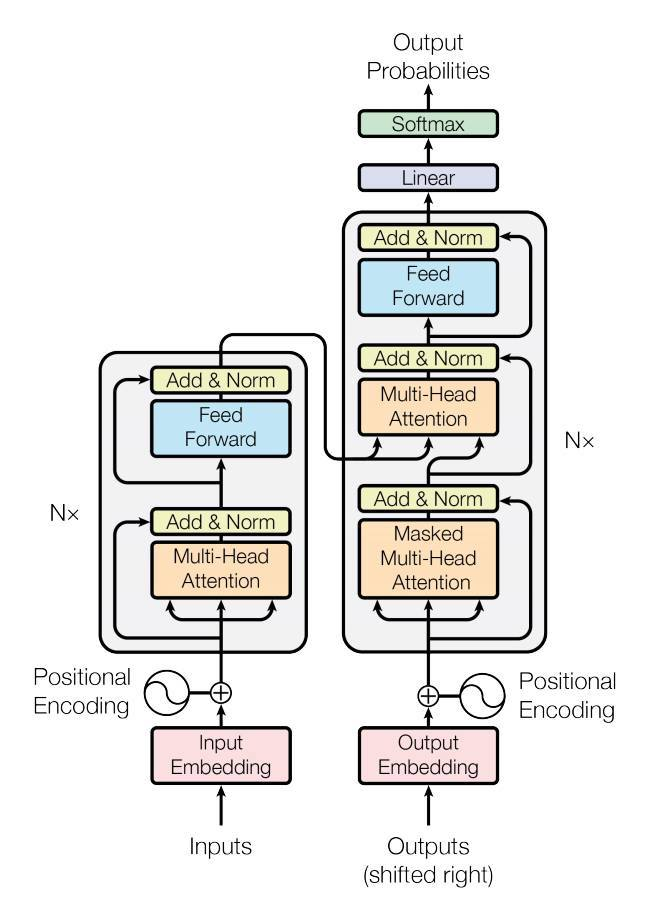


## Limitations of Traditional seq2seq Models

Before diving into the Transformer, let’s revisit traditional seq2seq models. Seq2seq models consist of an encoder-decoder structure:
- **Encoder:** Compresses the input sequence into a single vector representation.
- **Decoder:** Generates the output sequence based on this compressed vector.

### Limitations:
- The encoder compresses the input sequence into a single vector, potentially losing some information during the compression process.
- Attention mechanisms were introduced to mitigate this issue by allowing the decoder to focus on relevant parts of the input sequence during decoding.

However, what if we went a step further and designed an encoder-decoder architecture using **only attention mechanisms**? This idea forms the foundation of the Transformer.

---




## Key Hyperparameters of the Transformer

The Transformer introduces several important hyperparameters. While the precise values can be adjusted for different tasks, the following are the values used in the original paper:

### 1. Embedding Dimension ($d_{\text{model}}$):
- Represents the fixed size of the input and output vectors in both the encoder and decoder.
- The dimension of the embedding vectors is also $(d_{\text{model}}$), and this size is maintained when passing data between layers of the encoder and decoder.
- **Paper Value:** $(d_{\text{model}} = 512$).

### 2. Number of Layers ($N$):
- Represents the number of stacked layers in both the encoder and decoder.
- **Paper Value:** 6 layers for both the encoder and decoder.

### 3. Number of Attention Heads ($h$):
- When performing attention, the Transformer splits the computation into multiple heads, computes attention in parallel, and then concatenates the results.
- This hyperparameter specifies the number of such parallel heads.
- **Paper Value:** $(h = 8$).

### 4. Feed-Forward Network Dimension ($d_{\text{ff}}$):
- Represents the size of the hidden layer in the feed-forward neural network within each Transformer block.
- The input and output dimensions of the feed-forward network are $(d_{\text{model}}$), while the hidden layer has a dimension of $(d_{\text{ff}}$).
- **Paper Value:** $(d_{\text{ff}} = 2048$).

---

The Transformer’s design demonstrates how these hyperparameters interact to produce a highly scalable and effective architecture. In subsequent sections, we will dive deeper into its mechanisms, including multi-head attention, positional encoding, and the overall encoder-decoder framework.

## Encoder - Decoder Structure

The Transformer maintains the encoder-decoder structure of traditional seq2seq models. While it does not use RNNs, it preserves the basic framework:
- **Encoder:** Processes the input sequence.
- **Decoder:** Generates the output sequence.

Unlike seq2seq models that use a single RNN in both the encoder and decoder, the Transformer divides the encoder and decoder into multiple layers. Each layer processes data independently and passes the results to the next layer.

---

### Differences from Traditional seq2seq

1. **RNN-Based seq2seq:**
   - Uses a single RNN in the encoder and another in the decoder.
   - Each RNN processes the sequence across \( t \) time steps.

2. **Transformer:**
   - Consists of multiple encoder and decoder layers.
   - Each encoder/decoder unit performs operations like self-attention and feed-forward transformations.
   - The paper suggests using **6 encoders** and **6 decoders** stacked sequentially.

---



### Encoder-Decoder Layer Stacking in the Transformer

1. **Encoder Layers (6 layers in the paper):**
   - Each layer includes:
     - Multi-Head Self-Attention Mechanism: Allows the encoder to focus on different parts of the input sequence.
     - Feed-Forward Neural Network (FFN): Applies non-linear transformations for feature extraction.
   - Outputs are passed to the next encoder layer.

2. **Decoder Layers (6 layers in the paper):**
   - Each layer includes:
     - Multi-Head Self-Attention Mechanism: Focuses on the decoder's generated sequence so far.
     - Encoder-Decoder Attention: Aligns the decoder with the encoder's outputs.
     - Feed-Forward Neural Network (FFN): Transforms the combined attention results.
   - Outputs are passed to the next decoder layer.

---



### Advantages of Layer Stacking

- **Increased Capacity:** By stacking layers, the Transformer can learn more complex patterns and relationships in the data.
- **Parallelism:** Unlike RNNs, the Transformer can process entire sequences simultaneously, greatly improving computational efficiency.


## Positional Encoding

Before delving into the internal workings of the Transformer, it is important to understand how the Transformer processes input data. One reason RNNs have been effective in natural language processing is their ability to process words sequentially, inherently capturing the **position information** of each word in the sequence.

However, the Transformer does not process input sequentially. This necessitates an alternative mechanism to provide position information to the model. To address this, Transformers use **Positional Encoding**, which adds position-aware values to each word's embedding vector, effectively informing the model of the word's position in the sequence.

---

### How Positional Encoding Works

Transformers use **sine** and **cosine functions** to generate position-aware values for the embeddings. These functions are defined as follows:

$$
PE_{\text{(pos, 2i)}} = \sin\left(\frac{\text{pos}}{10000^{\frac{2i}{d_{\text{model}}}}}\right)
$$

$$
PE_{\text{(pos, 2i+1)}} = \cos\left(\frac{\text{pos}}{10000^{\frac{2i}{d_{\text{model}}}}}\right)
$$


#### Explanation of Variables:
- $ \text{pos} $: The position of the word in the sequence.
- $ i $: The index of the embedding dimension.
- $ d_{\text{model}} $: The embedding size (e.g., 512 in the original paper).
- **Even indices** $(2i$): Use the sine function.
- **Odd indices** $(2i+1$): Use the cosine function.


#### Benefits of Positional Encoding

Adding positional encoding preserves the order information in the input sequence. For example:
- Even if the same word appears multiple times in a sentence, its **positional encoding** ensures that the embedding reflects its position within the sequence.
- This approach allows the Transformer to process sequences non-sequentially while retaining positional context.


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class PositionalEncoding(nn.Module):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.d_model = d_model
        self.position = position
        self.pos_encoding = self.create_positional_encoding(position, d_model)

    def create_positional_encoding(self, position, d_model):
        # Compute angle rates
        angle_rads = np.zeros((position, d_model))
        for pos in range(position):
            for i in range(d_model):
                if i % 2 == 0:  # Even indices
                    angle_rads[pos, i] = np.sin(pos / (10000 ** (2 * i / d_model)))
                else:  # Odd indices
                    angle_rads[pos, i] = np.cos(pos / (10000 ** (2 * (i // 2) / d_model)))

        # Convert to tensor
        pos_encoding = torch.tensor(angle_rads, dtype=torch.float32)
        return pos_encoding.unsqueeze(0)  # Add batch dimension

    def forward(self, x):
        """
        Add positional encoding to the input embeddings
        :param x: Input tensor of shape (batch_size, seq_len, d_model)
        :return: Tensor with positional encoding added
        """
        seq_len = x.size(1)
        return x + self.pos_encoding[:, :seq_len, :].to(x.device)

# Example Usage
# Sentence length: 50, Embedding dimension: 128
seq_len = 50
d_model = 128
pos_encoding = PositionalEncoding(seq_len, d_model)

# Visualize the positional encoding
plt.figure(figsize=(10, 6))
plt.pcolormesh(pos_encoding.pos_encoding.squeeze(0).numpy(), cmap='RdBu')
plt.xlabel('Depth (Embedding Dimension)')
plt.ylabel('Position')
plt.colorbar()
plt.title('Positional Encoding Visualization')
plt.show()


---

## Attention

The Transformer architecture employs three distinct types of attention mechanisms, each designed for specific purposes. These attention mechanisms are integral to the functioning of the encoder and decoder layers.


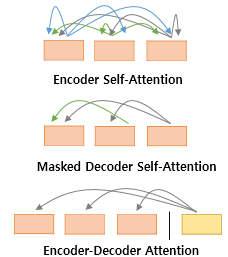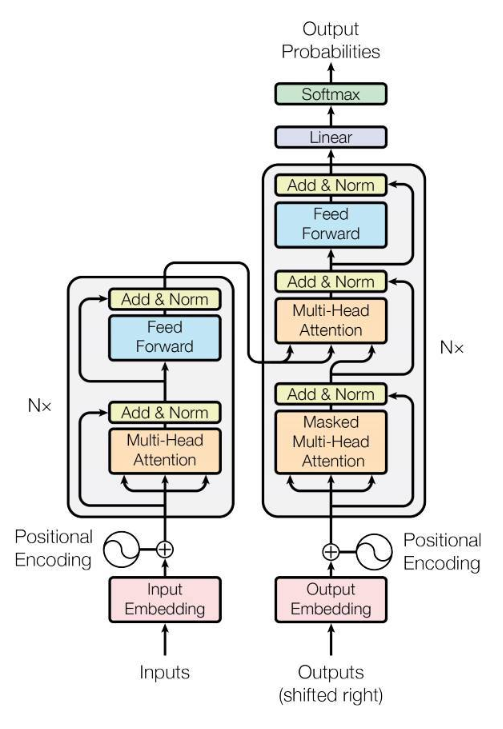



### Encoder Self-Attention

- **Definition:** Self-attention in the encoder occurs when **Query**, **Key**, and **Value** vectors originate from the same source: the encoder's input sequence.
- **Purpose:** Allows each token in the input sequence to focus on other tokens, capturing contextual relationships within the sequence.
- **Query = Key = Value**  
  (All derived from the encoder's input vectors).

---

### Decoder Masked Self-Attention

- **Definition:** Similar to encoder self-attention, but with an additional **masking** mechanism to ensure that the decoder does not attend to future tokens. This ensures autoregressive behavior during sequence generation.
- **Purpose:** Enables the decoder to focus on previously generated tokens while preventing access to future tokens.
- **Query = Key = Value**  
  (All derived from the decoder's generated sequence so far).
---

### Encoder-Decoder Attention

- **Definition:** Unlike self-attention, the **Query**, **Key**, and **Value** vectors come from different sources.  
  - **Query:** Derived from the decoder's hidden states.
  - **Key** and **Value:** Derived from the encoder's output vectors.
- **Purpose:** Aligns the decoder's sequence generation process with relevant parts of the input sequence.
- **Query:** Decoder vectors.  
- **Key = Value:** Encoder vectors.

---

### Summary of Attention Types

| **Attention Type**             | **Query**             | **Key**               | **Value**             | **Purpose**                                                    |
|---------------------------------|-----------------------|-----------------------|-----------------------|----------------------------------------------------------------|
| **Encoder Self-Attention**      | Encoder Input         | Encoder Input         | Encoder Input         | Capture relationships within the input sequence.              |
| **Decoder Masked Self-Attention** | Decoder Sequence (so far) | Decoder Sequence (so far) | Decoder Sequence (so far) | Focus on previously generated tokens.                         |
| **Encoder-Decoder Attention**   | Decoder Hidden States | Encoder Output        | Encoder Output        | Align decoder generation with relevant input sequence parts.  |

---



### Multi-Head Attention

In all three cases, the attention mechanism is referred to as **Multi-Head Attention** in the Transformer. This indicates that the attention is computed in **parallel** across multiple attention heads, each focusing on different subspaces of the input. This parallelization improves the model's capacity to capture a wider range of relationships and dependencies in the data.

## Self-Attention in the Transformer

Self-Attention is a key mechanism in the Transformer model. Let’s revisit the concept of attention and explore how self-attention differs from standard attention mechanisms.

---

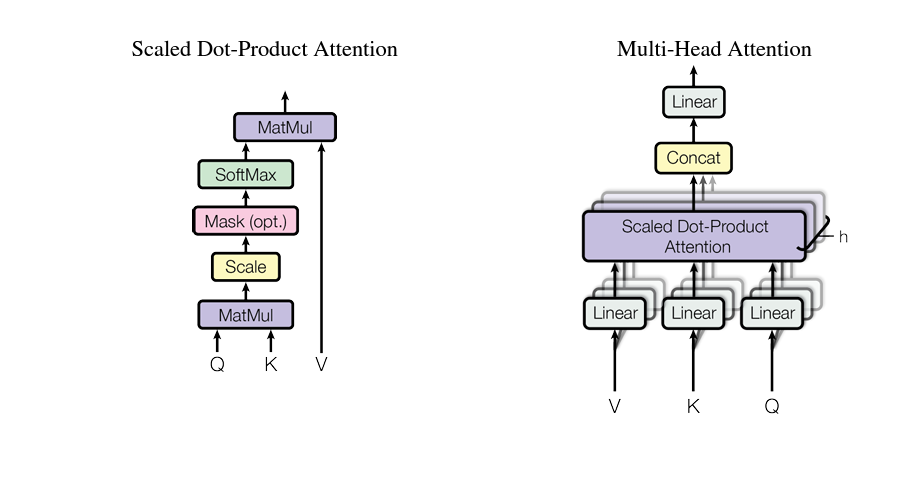

Ref: Vaswani, A. (2017). Attention is all you need. Advances in Neural Information Processing Systems. (https://arxiv.org/abs/1706.03762)

### Attention Refresher:
- Attention calculates the **relevance** (or similarity) between a given **Query (Q)** and all possible **Keys (K)**.
- The resulting relevance scores are normalized and used as weights to compute a weighted sum of **Values (V)**.

### Self-Attention:
- Unlike standard attention, **Self-Attention** performs attention on the same sequence.  
  This means:
  - **Query = Key = Value**, all derived from the same input sequence.

### Query, Key, and Value Definitions
| **Context**           | **Query**                      | **Key**                  | **Value**                |
|------------------------|--------------------------------|--------------------------|--------------------------|
| Standard Attention     | Decoder hidden state at \(t\) | Encoder hidden states    | Encoder hidden states    |
| **Self-Attention**     | Input sequence word vectors   | Input sequence word vectors | Input sequence word vectors |

Self-attention enables the model to capture relationships between words in the same sequence, regardless of their distance.

### Advantages of Self-Attention
Self-attention helps resolve ambiguities by focusing on relationships within the same sequence. For example:
- In the sentence **"The animal didn’t cross the street because it was too tired,"**  
  self-attention associates "it" with "animal" rather than "street" based on their contextual relationships.

---

### Generating Q, K, and V Vectors



1. **Input Representation:**
   - Each word in the input sequence is represented by a word vector with dimension $(d_{\text{model}}$).
   - Example: If $(d_{\text{model}} = 512$), each word vector has 512 dimensions.

2. **Transformations for Q, K, V:**
   - Input word vectors are linearly transformed into **Query (Q)**, **Key (K)**, and **Value (V)** vectors using learnable weight matrices:
     - $(W_Q, W_K, W_V \in \mathbb{R}^{d_{\text{model}} \times d_k}$)
   - The resulting Q, K, V vectors typically have a smaller dimension $(d_k = d_{\text{model}} / h$), where $(h$) is the number of attention heads.
---


### Scaled Dot-Product Attention

#### Formula:
The Scaled Dot-Product Attention mechanism calculates attention scores and values as follows:

1. **Attention Scores:**
   - $ \text{Attention Scores} = \frac{QK^\top}{\sqrt{d_k}} $
   - Scaling by $( \sqrt{d_k} $) prevents overly large values, which could destabilize softmax.

2. **Softmax Normalization:**
   - Apply softmax to obtain **Attention Weights**:
     - $ \text{Attention Weights} = \text{softmax}\left(\frac{QK^\top}{\sqrt{d_k}}\right) $

3. **Weighted Sum:**
   - Use the weights to compute a weighted sum of **Values (V)**:
     - $ \text{Output} = \text{Attention Weights} \cdot V $

---



### Matrix-Based Implementation

Instead of processing each query individually, the Transformer processes the entire sequence simultaneously using matrix operations:

1. Compute **Q, K, V matrices**:
   - $ Q, K, V \in \mathbb{R}^{\text{seq_len} \times d_k} $

2. Compute **Attention Scores**:
   - $ \text{Scores} = QK^\top / \sqrt{d_k} $.

3. Normalize with Softmax:
   - $ \text{Weights} = \text{softmax}(\text{Scores}) $.

4. Compute Final Output:
   - $ \text{Output} = \text{Weights} \cdot V $.


### Multi-Head Attention

The Transformer enhances the single attention mechanism through **Multi-Head Attention**, which allows the model to capture multiple perspectives in the data.

#### How It Works:
1. **Dimension Splitting:**  
   - The model dimension $(d_{\text{model}}$) is divided into multiple smaller dimensions $(d_k$) for each attention head.
   - Example: If $(d_{\text{model}} = 512$) and the number of heads $(h$) is 8, then $(d_k = 512 / 8 = 64$).

2. **Parallel Attention:**  
   - Each head computes attention independently on its own $(d_k$)-dimensional subspace of the input.
   - Different heads can focus on various relationships (e.g., syntactic and semantic dependencies).

3. **Concatenation and Transformation:**  
   - Outputs from all attention heads are concatenated and linearly transformed to produce the final output of dimension $(d_{\text{model}}$).

---

#### Importance of Self-Attention

Self-attention is pivotal in the Transformer's architecture:
- It enables the model to capture intra-sequence relationships efficiently.
- Combined with multi-head attention, it allows the Transformer to represent diverse aspects of data simultaneously.
- This mechanism forms the backbone of modern NLP models and has transformed tasks like translation, summarization, and more.

### Padding Mask in Transformers

#### What is a Padding Mask?

In natural language processing, padding tokens (`<PAD>`) are often added to sequences to ensure they are of uniform length. However, padding tokens do not carry any semantic meaning and should not influence the model's computations, especially during attention mechanisms.

A **Padding Mask** is used to exclude `<PAD>` tokens from attention calculations. It ensures that:
- The model does not compute attention weights for `<PAD>` tokens.
- `<PAD>` tokens have no effect on the output of the attention mechanism.

---

#### How Does Padding Mask Work?

##### Attention Mechanism Recap:
1. Attention scores are computed using the **Query (Q)** and **Key (K)** matrices.
2. Softmax is applied to the attention scores to produce attention weights.
3. These weights are used to compute a weighted sum of the **Value (V)** matrix.

### Padding Mask Application:
- **Masking in the Attention Score Matrix:**
  - Before applying softmax, the attention score matrix is modified using the mask.
  - Positions corresponding to `<PAD>` tokens in the **Key (K)** matrix are set to a very large negative value (e.g., `-1e9`).
- **Effect on Softmax:**
  - Softmax converts these large negative values to near-zero probabilities.
  - `<PAD>` tokens are effectively ignored in the attention calculation.

---


## Position-wise Feed-Forward Neural Network (FFNN)

The **Position-wise FFNN** is a shared sublayer in both the encoder and decoder of the Transformer. It is essentially a **fully connected feed-forward neural network** applied independently to each position in the sequence.

---

### Position-wise FFNN Formula

The Position-wise FFNN can be expressed mathematically as:

$
FFNN(x) = \text{ReLU}(xW_1 + b_1)W_2 + b_2
$

#### Explanation of Variables:
- **$x$:** Input tensor of shape $((\text{seq_len}, d_{\text{model}})$), where each row corresponds to a position in the input sequence.
- **$ W_1 \in \mathbb{R}^{d_{\text{model}} \times d_{\text{ff}}}$:** Weight matrix for the first linear transformation.
- **$ b_1 \in \mathbb{R}^{d_{\text{ff}}}$:** Bias vector for the first transformation.
- **$W_2 \in \mathbb{R}^{d_{\text{ff}} \times d_{\text{model}}}$:** Weight matrix for the second linear transformation.
- **$b_2 \in \mathbb{R}^{d_{\text{model}}}$:** Bias vector for the second transformation.
- **$\text{ReLU}$:** Activation function introducing non-linearity.

---


### Position-wise Operation

Each position in the input sequence is processed independently:
- The same weight matrices $(W_1, W_2$) and biases $(b_1, b_2$) are applied across all positions.
- This ensures the computations are **position-wise** but still identical for each word vector within a single encoder or decoder layer.

---

### Key Characteristics

1. **Dimensionality Preservation:**  
   - Although the intermediate layer has dimension $(d_{\text{ff}}$) (e.g., 2048 in the original paper), the input ($(d_{\text{model}} = 512$)) and output ($(d_{\text{model}} = 512$)) dimensions remain the same.

2. **Shared Parameters:**  
   - Within a single encoder/decoder layer:
     - All positions share the same weight matrices $(W_1, W_2$) and biases $(b_1, b_2$).
   - Between layers:
     - Different encoder/decoder layers have independent parameters.

3. **Efficiency:**  
   - The FFNN processes all positions in parallel, leveraging matrix operations for computational efficiency.

---

## Add & Norm: Residual Connection and Layer Normalization in Transformers

The **Add & Norm** component in Transformers combines two key techniques: **Residual Connections** and **Layer Normalization**. These techniques enhance the model's ability to learn effectively and stabilize training.

---



### Residual Connection

A residual connection is a technique where the input to a layer is added directly to the layer's output. This bypass connection helps preserve information from earlier layers and mitigates issues like vanishing gradients.

#### Formula:
Let $( x $) be the input to a sublayer and $( \text{Sublayer}(x) $) the output of the sublayer. The residual connection can be expressed as:

$
\text{Output} = x + \text{Sublayer}(x)
$


### Benefits of Residual Connections:
- **Preserves Information:** Bypasses enable the model to retain critical information from earlier layers.
- **Improves Gradient Flow:** Reduces vanishing gradient problems, especially in deep networks.
- **Stabilizes Training:** Makes optimization more effective.

---


### Layer Normalization

Layer Normalization is a technique to normalize the input across its feature dimensions. Unlike Batch Normalization, it works independently for each sample in a batch.

### Formula:
After applying the residual connection, layer normalization is applied:

$
\text{NormOutput} = \text{LayerNorm}(x + \text{Sublayer}(x))
$

### Benefits of Layer Normalization:
- **Efficient Normalization:** Normalizes across feature dimensions for each sample independently.
- **Stabilizes Outputs:** Helps prevent exploding or vanishing activations during training.

## Encoder

In [ ]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0
        self.d_model = d_model
        self.num_heads = num_heads
        self.depth = d_model // num_heads

        self.query_dense = nn.Linear(d_model, d_model)
        self.key_dense = nn.Linear(d_model, d_model)
        self.value_dense = nn.Linear(d_model, d_model)
        self.final_dense = nn.Linear(d_model, d_model)

    def split_heads(self, x, batch_size):
        return x.view(batch_size, -1, self.num_heads, self.depth).transpose(1, 2)

    def forward(self, query, key, value, mask=None):
        batch_size = query.size(0)

        query = self.split_heads(self.query_dense(query), batch_size)
        key = self.split_heads(self.key_dense(key), batch_size)
        value = self.split_heads(self.value_dense(value), batch_size)

        # Scaled Dot-Product Attention
        scores = torch.matmul(query, key.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.depth, dtype=torch.float32))
        if mask is not None:
            scores += mask * -1e9
        attention_weights = torch.nn.functional.softmax(scores, dim=-1)
        output = torch.matmul(attention_weights, value)

        # Concatenate and Final Dense Layer
        output = output.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
        return self.final_dense(output)


class PositionwiseFFNN(nn.Module):
    def __init__(self, d_model, dff):
        super(PositionwiseFFNN, self).__init__()
        self.fc1 = nn.Linear(d_model, dff)
        self.fc2 = nn.Linear(dff, d_model)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))


class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, dff, dropout=0.1):
        super(EncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = PositionwiseFFNN(d_model, dff)

        self.layernorm1 = nn.LayerNorm(d_model, eps=1e-6)
        self.layernorm2 = nn.LayerNorm(d_model, eps=1e-6)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        # Multi-head attention with residual connection
        attn_output = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x + attn_output)

        # Feed-forward network with residual connection
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2


class Encoder(nn.Module):
    def __init__(self, vocab_size, num_layers, d_model, num_heads, dff, dropout=0.1):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.positional_encoding = self.create_positional_encoding(vocab_size, d_model)

        self.enc_layers = nn.ModuleList([
            EncoderLayer(d_model, num_heads, dff, dropout) for _ in range(num_layers)
        ])
        self.dropout = nn.Dropout(dropout)

    def create_positional_encoding(self, vocab_size, d_model):
        position = torch.arange(0, vocab_size).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(torch.log(torch.tensor(10000.0)) / d_model))
        pos_encoding = torch.zeros(vocab_size, d_model)
        pos_encoding[:, 0::2] = torch.sin(position * div_term)
        pos_encoding[:, 1::2] = torch.cos(position * div_term)
        return pos_encoding.unsqueeze(0)

    def forward(self, x, mask=None):
        seq_len = x.size(1)
        x = self.embedding(x) * torch.sqrt(torch.tensor(self.embedding.embedding_dim, dtype=torch.float32))
        x += self.positional_encoding[:, :seq_len, :].to(x.device)

        x = self.dropout(x)
        for layer in self.enc_layers:
            x = layer(x, mask)

        return x


### Key Highlights of the Encoder Implementation

#### 1. Multi-Head Attention
- **Implementation:**  
  Multi-Head Attention is implemented using `nn.Linear` layers to transform the input into **Query (Q)**, **Key (K)**, and **Value (V)** matrices. These transformations allow the model to compute relationships between input tokens.
- **Attention Mechanism:**  
  The **Scaled Dot-Product Attention** mechanism is used to compute attention scores, normalize them with softmax, and produce weighted sums of the values (V).

---

#### 2. Position-wise Feed-Forward Neural Network (FFNN)
- **Structure:**  
  The FFNN is a fully connected network with:
  - A hidden layer activated by ReLU.
  - An output layer projecting back to the model's dimensionality.
- **Purpose:**  
  It applies non-linear transformations independently to each token in the sequence, enhancing the representation power of the model.

---

#### 3. Residual Connections & Layer Normalization
- **Residual Connections:**  
  - Add the input of each sublayer (e.g., Multi-Head Attention or FFNN) directly to its output, helping gradients flow smoothly through the network.
  - Formula:
    $
    \text{Output} = \text{LayerNorm}(x + \text{Sublayer}(x))
    $
- **Layer Normalization:**  
  - Normalizes the output along the feature dimension to stabilize training.
  - Reduces dependencies on batch statistics, making it ideal for Transformers.

---

#### 4. Positional Encoding
- **Purpose:**  
  Transformers lack inherent sequential processing like RNNs. Positional encodings explicitly inject position information into token embeddings.
- **Implementation:**  
  - Pre-computed sinusoidal encodings are added to the embeddings of each token.
  - This helps the model differentiate between tokens based on their positions in the sequence.

---

#### 5. Modularity
- **Stackable Encoder Layers:**  
  The encoder is implemented as a stack of `EncoderLayer` modules, with each layer containing:
  - Multi-Head Attention,
  - Position-wise FFNN,
  - Residual Connections,
  - Layer Normalization.
- **Customization:**  
  - The number of layers ($num\_layers$) can be adjusted for deeper or shallower encoders.
  - Dropout rates, dimensionalities ($d_{\text{model}}$, $d_{\text{ff}}$), and attention heads ($num\_heads$) are all configurable.

---



### Summary of the Encoder
The encoder in the Transformer processes the input sequence through multiple layers, denoted as $(N_{\text{encoder}}$).

Each encoder layer performs:
- Multi-Head Attention
- Position-wise Feed-Forward Neural Network
- Residual Connections with Layer Normalization

The final output of the encoder, after $(N_{\text{encoder}}$) layers, serves as a contextual representation of the input sequence, capturing both positional and semantic information.

---

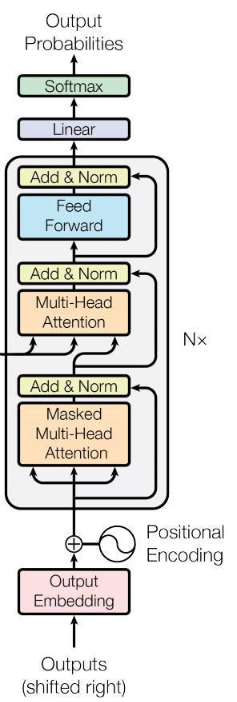

### Transition to the Decoder
Once the encoder has completed its computations, the output is passed to the decoder. The decoder, like the encoder, is composed of $(N_{\text{decoder}}$) layers, where each layer utilizes:

1. **Masked Multi-Head Attention:** Operates on the decoder's own outputs from the previous time steps.
2. **Encoder-Decoder Attention:** Attends to the encoder's final output.
3. **Position-wise Feed-Forward Neural Network:** Applies transformations to enhance representation power.

The encoder's output is used in every decoder layer as a key component for the encoder-decoder attention mechanism.

---

### Decoder Architecture

Each layer in the decoder consists of the following sublayers:

1. **Masked Multi-Head Attention:**  
   - Ensures that each position in the sequence only attends to previous positions (important for auto-regressive generation).
   - Prevents information leakage from future tokens during training.
   
2. **Encoder-Decoder Attention:**  
   - This is where the decoder queries the encoder's output to gain context about the input sequence.
   - Query (\(Q\)) comes from the decoder's previous layer, while Key (\(K\)) and Value (\(V\)) come from the encoder's output.

3. **Position-wise Feed-Forward Neural Network:**  
   - Similar to the encoder, this FFNN processes each position independently.

4. **Residual Connections and Layer Normalization:**  
   - Residual connections help gradients flow more effectively.
   - Layer normalization stabilizes training and ensures consistent scaling of outputs.

### Key Data Flow
- The **encoder's output** is passed to each layer of the decoder as input for the encoder-decoder attention mechanism.
- The **decoder's output** is computed step-by-step during inference, with each token generated being fed back into the model to predict the next token.


---


## Look-Ahead Mask in Transformers


The **Look-Ahead Mask** is applied in the **first sublayer of the decoder** (Masked Multi-Head Self-Attention). Its purpose is to prevent the model from "peeking" at future tokens when generating output, ensuring the sequence generation remains **auto-regressive**.




### How It Works:
1. **Attention Scores Calculation:**  
   The self-attention mechanism computes the attention scores as usual.

2. **Masking Future Tokens:**  
   - Any token can only attend to itself and the tokens before it.
   - Future tokens are masked by replacing their attention scores with a very small negative value (e.g., \(-1e9\)).

3. **Key Difference:**  
   While the operation is similar to the encoder's self-attention, the look-ahead mask is applied to the attention score matrix, making future tokens inaccessible.


## Encoder-Decoder Attention in Transformers




The **Encoder-Decoder Attention** is the second sublayer in the decoder. While it performs multi-head attention like the previous attention mechanisms (encoder's self-attention and decoder's first sublayer), it is **not self-attention**. Here's why:

### Key Difference:
- In **self-attention**, \(Q\), \(K\), and \(V\) are all derived from the same source (either encoder or decoder).
- In **encoder-decoder attention**:
  - \(Q\) (Query): Derived from the decoder's output (result of the first sublayer).
  - \(K\), \(V\) (Key and Value): Derived from the encoder's output (final layer).

---


## Q, K, V Relationships Across Sublayers

| **Sublayer**                        | **Query (Q)**          | **Key (K)**         | **Value (V)**       |
|-------------------------------------|------------------------|---------------------|---------------------|
| Encoder's First Sublayer            | Encoder Outputs        | Encoder Outputs     | Encoder Outputs     |
| Decoder's First Sublayer (Self-Attention) | Decoder Outputs        | Decoder Outputs     | Decoder Outputs     |
| Decoder's Second Sublayer (Encoder-Decoder Attention) | Decoder Outputs (First Sublayer) | Encoder Outputs     | Encoder Outputs     |

In **encoder-decoder attention**, the decoder queries the encoded representations to attend to relevant parts of the input sequence.

---



### Attention Score Matrix

1. Compute **Attention Scores** using:

   $
   \text{Attention Scores} = \frac{QK^T}{\sqrt{d_k}}
   $
   - $Q$: From the decoder's output.
   - $K$: From the encoder's output.
   - $d_k$: Dimensionality of the \(K\) vectors.

2. Apply **Softmax** to normalize the scores into probabilities:

   $
   \text{Attention Weights} = \text{Softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)
   $

3. Use the weights to compute the **weighted sum** of \(V\) (Value vectors from the encoder):

   $
   \text{Attention Output} = \text{Attention Weights} \cdot V
   $
---

### Purpose of Encoder-Decoder Attention
- Aligns the **input sequence (encoder outputs)** with the **generated sequence (decoder outputs)**.
- Allows the decoder to attend to specific parts of the input while generating each token.

---

## Decorder

In [ ]:
import torch
import torch.nn as nn

class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, dff, dropout=0.1):
        super(DecoderLayer, self).__init__()

        # Multi-Head Attention Layers
        self.self_attention = nn.MultiheadAttention(embed_dim=d_model, num_heads=num_heads, dropout=dropout)
        self.enc_dec_attention = nn.MultiheadAttention(embed_dim=d_model, num_heads=num_heads, dropout=dropout)

        # Feed-Forward Network
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, dff),
            nn.ReLU(),
            nn.Linear(dff, d_model)
        )

        # Layer Normalization and Dropout
        self.layernorm1 = nn.LayerNorm(d_model, eps=1e-6)
        self.layernorm2 = nn.LayerNorm(d_model, eps=1e-6)
        self.layernorm3 = nn.LayerNorm(d_model, eps=1e-6)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        self.dropout3 = nn.Dropout(dropout)

    def forward(self, x, enc_output, look_ahead_mask=None, padding_mask=None):
        # First sublayer: Masked Self-Attention
        attn_output, _ = self.self_attention(x, x, x, attn_mask=look_ahead_mask)
        out1 = self.layernorm1(x + self.dropout1(attn_output))

        # Second sublayer: Encoder-Decoder Attention
        attn_output, _ = self.enc_dec_attention(out1, enc_output, enc_output, attn_mask=padding_mask)
        out2 = self.layernorm2(out1 + self.dropout2(attn_output))

        # Third sublayer: Feed-Forward Network
        ff_output = self.feed_forward(out2)
        out3 = self.layernorm3(out2 + self.dropout3(ff_output))

        return out3


class Decoder(nn.Module):
    def __init__(self, vocab_size, num_layers, d_model, num_heads, dff, dropout=0.1, max_len=5000):
        super(Decoder, self).__init__()
        self.num_layers = num_layers
        self.d_model = d_model

        # Embedding and Positional Encoding
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoding = self._generate_positional_encoding(max_len, d_model)
        self.dropout = nn.Dropout(dropout)

        # Stack of Decoder Layers
        self.layers = nn.ModuleList([
            DecoderLayer(d_model, num_heads, dff, dropout) for _ in range(num_layers)
        ])

        self.layernorm = nn.LayerNorm(d_model, eps=1e-6)

    def _generate_positional_encoding(self, max_len, d_model):
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-torch.log(torch.tensor(10000.0)) / d_model))
        pos_encoding = torch.zeros(max_len, d_model)
        pos_encoding[:, 0::2] = torch.sin(position * div_term)
        pos_encoding[:, 1::2] = torch.cos(position * div_term)
        return pos_encoding.unsqueeze(0)

    def forward(self, x, enc_output, look_ahead_mask=None, padding_mask=None):
        seq_len = x.size(1)
        pos_encoding = self.pos_encoding[:, :seq_len, :].to(x.device)

        # Add Embedding and Positional Encoding
        x = self.embedding(x) * torch.sqrt(torch.tensor(self.d_model, dtype=torch.float32))
        x += pos_encoding
        x = self.dropout(x)

        # Pass through Decoder Layers
        for layer in self.layers:
            x = layer(x, enc_output, look_ahead_mask, padding_mask)

        return self.layernorm(x)


### Key Highlights of the Implementation

#### 1. First Sublayer: Masked Self-Attention
- **Functionality:**  
  Computes attention over the decoder's own outputs.
- **Masking:**  
  - Uses the **look-ahead mask** to prevent access to future tokens.
  - Ensures autoregressive behavior by restricting the model to only reference previous tokens.

---

#### 2. Second Sublayer: Encoder-Decoder Attention
- **Functionality:**  
  Computes attention over the encoder's output.
- **Masking:**  
  - Uses the **padding mask** to ignore padding tokens in the encoder's output.
  - Focuses the attention mechanism on meaningful parts of the input sequence.

---

#### 3. Third Sublayer: Feed-Forward Neural Network
- **Structure:**  
  A fully connected network with:
  - A hidden layer activated by ReLU.
  - An output layer projecting back to the model's dimensionality.
- **Purpose:**  
  Applies non-linear transformations independently to each token, enhancing the model's expressiveness.

---

#### 4. Residual Connections and Layer Normalization
- **Residual Connections:**  
  - Adds the input of each sublayer directly to its output, facilitating stable gradients and deeper architectures.

- **Layer Normalization:**  
  - Normalizes token representations along the feature dimension.
  - Stabilizes training by reducing internal covariate shifts.

---

#### 5. Positional Encoding
- **Purpose:**  
  Injects positional information into token embeddings, addressing the Transformer's lack of sequential processing.
- **Implementation:**  
  - Pre-computed sinusoidal values are added to token embeddings.
  - Differentiates tokens based on their positions in the sequence.


## Transformer

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import math

class Transformer(nn.Module):
    def __init__(self, vocab_size, num_layers, d_model, num_heads, dff, dropout=0.3):
        super(Transformer, self).__init__()
        self.encoder = Encoder(vocab_size, num_layers, d_model, num_heads, dff, dropout)
        self.decoder = Decoder(vocab_size, num_layers, d_model, num_heads, dff, dropout)
        self.final_layer = nn.Linear(d_model, vocab_size)

    def forward(self, src, tgt, src_mask, tgt_mask):
        # Encoder forward pass
        enc_output = self.encoder(src, src_mask)

        # Decoder forward pass
        dec_output = self.decoder(tgt, enc_output, tgt_mask, src_mask)

        # Final linear layer for predictions
        final_output = self.final_layer(dec_output)

        return final_output

# Define the learning rate scheduler
class CustomSchedule:
    def __init__(self, d_model, warmup_steps=4000):
        self.d_model = d_model
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        return (self.d_model ** -0.5) * min(arg1, arg2)

# Loss function for the transformer
def loss_function(y_true, y_pred, pad_token_id):
    criterion = nn.CrossEntropyLoss(ignore_index=pad_token_id, reduction='mean')
    return criterion(y_pred.view(-1, y_pred.size(-1)), y_true.view(-1))

# Learning rate scheduler visualization
import matplotlib.pyplot as plt
d_model = 128
warmup_steps = 4000
scheduler = CustomSchedule(d_model, warmup_steps)

steps = torch.arange(1, 20000).float()
lr_values = [scheduler(step) for step in steps]

plt.plot(steps, lr_values)
plt.ylabel("Learning Rate")
plt.xlabel("Training Step")
plt.title("Learning Rate Schedule")
plt.show()

# Example instantiation of a small Transformer model
vocab_size = 9000
num_layers = 4
d_model = 128
num_heads = 4
dff = 512
dropout = 0.3

transformer = Transformer(
    vocab_size=vocab_size,
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    dropout=dropout
)

print(transformer)


### Key Highlights

#### 1. Multi-Head Attention
- **Parallel Computation:**  
  Implements scaled dot-product attention with multiple heads for efficient parallel computation.
- **Masking Support:**  
  - **Look-Ahead Masks:** Ensures autoregressive behavior by masking future tokens in the decoder.  
  - **Padding Masks:** Ignores padding tokens during attention calculations.

---

#### 2. Position-Wise Feed Forward Networks
- **Structure:**  
  Fully connected feed-forward networks with:
  - Non-linear activations (e.g., ReLU).  
- **Enhancements:**  
  - Residual connections are applied to stabilize training and improve gradient flow.
  - Layer normalization ensures normalized outputs after each sublayer.

---

#### 3. Positional Encoding
- **Purpose:**  
  Injects positional information into token embeddings, enabling the model to capture sequence order.
- **Implementation:**  
  - Adds sinusoidal positional encodings to embeddings, differentiating tokens by their positions.

---

#### 4. Learning Rate Scheduler
- **Dynamic Adjustment:**  
  Combines a warm-up phase with a decay phase for efficient optimization.  
- **Formula:**  
  \[
  \text{LearningRate} = \frac{1}{\sqrt{d_{\text{model}}}} \cdot \min \left( \text{step}^{-0.5}, \text{step} \cdot \text{warmup\_steps}^{-1.5} \right)
  \]
- **Visualization:**  
  The learning rate schedule is visualized to verify the implementation and expected behavior.

---

#### 5. Training
- **Loss Function:**  
  - Ignores padding tokens during training, ensuring the model focuses on meaningful tokens.
- **Learning Rate Scheduler:**  
  - Supports stable and efficient training, particularly during the initial warm-up phase.

---

## Practice: Hugging face

## Embedding

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load a pre-trained model and tokenizer
model_name = "bert-base-uncased"  # You can replace this with a different model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Input sentences
sentences = [
    "Hugging Face provides state-of-the-art NLP models.",
    "Transformers make deep learning accessible and efficient."
]

# Tokenize the input sentences and create input tensors
inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")

# Generate outputs from the model
with torch.no_grad():  # Disable gradient calculation for inference
    outputs = model(**inputs)

# Extract the last hidden states from the outputs
last_hidden_states = outputs.last_hidden_state  # shape: [batch_size, seq_len, hidden_size]

# Compute sentence embeddings (using the [CLS] token embedding here)
sentence_embeddings = last_hidden_states[:, 0, :]  # shape: [batch_size, hidden_size]

# Print the results
print("Sentence Embeddings Shape:", sentence_embeddings.shape)
print("First Sentence Embedding:", sentence_embeddings[0])


## Translator: English to French

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load a pre-trained translation model and tokenizer
model_name = "Helsinki-NLP/opus-mt-en-fr"  # English to French translation model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Input sentences to translate
sentences = [
    "Hugging Face makes NLP easy.",
    "Transformers are very powerful models."
]

# Tokenize the input sentences
inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)

# Generate translations
outputs = model.generate(**inputs)

# Decode the translated sentences
translated_sentences = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]

In [ ]:
for i, translation in enumerate(translated_sentences):
    print(f"Original: {sentences[i]}")
    print(f"Translated: {translation}")

## Translator: Korean to English

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load a pre-trained translation model and tokenizer
model_name = "Helsinki-NLP/opus-mt-ko-en"  # Korean to English translation model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Input sentences to translate
sentences = [
    "허깅페이스는 자연어 처리를 쉽게 만들어 줍니다.",
    "트랜스포머는 매우 강력한 모델입니다.",
    "트랜스포머는 너무 좋습니다",
    "손흥민은 토트넘의 축구선수입니다.",
    "UNIST는 대한민국의 대학교입니다."
]

# Tokenize the input sentences
inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)

# Generate translations
outputs = model.generate(**inputs)

# Decode the translated sentences
translated_sentences = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]

# Print results
for i, translation in enumerate(translated_sentences):
    print(f"Original (Korean): {sentences[i]}")
    print(f"Translated (English): {translation}")
